In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
iris=datasets.load_iris()

In [17]:
X=iris.data
y=iris.target

In [18]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [20]:
clf=svm.SVC(kernel='linear')
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [21]:
y_pred=clf.predict(X_test)

In [22]:
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [23]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9777777777777777

In [24]:
classif=classification_report(y_test,y_pred)
print(classif)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [25]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[16,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 11]], dtype=int64)

<Axes: >

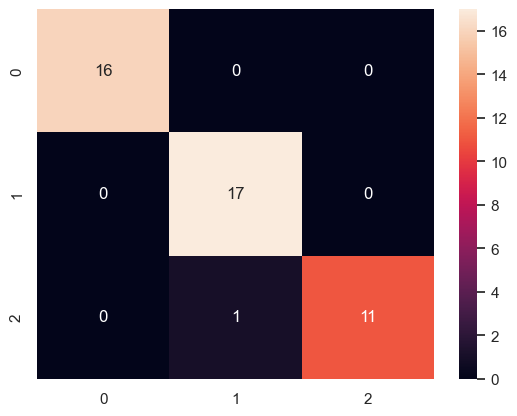

In [26]:
import seaborn as sns
sns.heatmap(cm,annot=True)

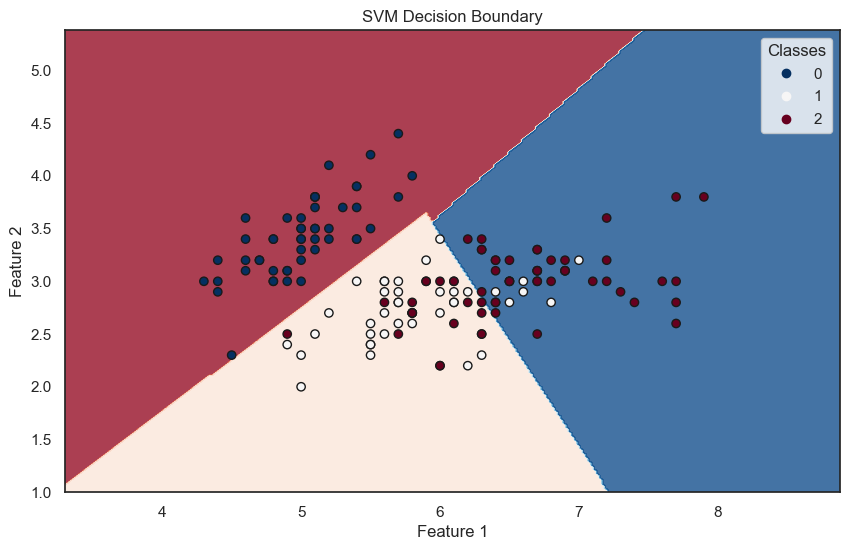

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
X = iris.data[:, :2]  # Take the first two features
y = iris.target

# Create an SVM classifier with a linear kernel
clf = SVC(kernel='linear')
clf.fit(X, y)

sns.set(style='white')
plt.figure(figsize=(10, 6))
# Plot the decision boundary (0: red, 1: green, 2: blue)
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot data points
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu_r, edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.legend(*scatter.legend_elements(), title='Classes')
plt.show()